In [1]:
import pandas as pd
from google.colab import files 
uploaded = files.upload()

Saving Corona_NLP_test.csv to Corona_NLP_test.csv
Saving Corona_NLP_train.csv to Corona_NLP_train.csv


In [2]:
train = pd.read_csv('./Corona_NLP_train.csv',encoding='latin1')
test = pd.read_csv('./Corona_NLP_test.csv', encoding='latin1')
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [3]:
df = pd.concat([train, test])
print(df.info())
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44955 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB
None
(44955, 6)


In [4]:
# changinf the datatypes 
df['OriginalTweet'] = df['OriginalTweet'].astype(str)
df['Sentiment'] = df['Sentiment'].astype(str)


train['OriginalTweet'] = train['OriginalTweet'].astype(str)
train['Sentiment'] = train['Sentiment'].astype(str)



test['OriginalTweet'] = test['OriginalTweet'].astype(str)
test['Sentiment'] = test['Sentiment'].astype(str)

df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
print('Training set shape = {}'.format(train.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(train.memory_usage().sum() / 1024**2))
print('Test Set Shape = {}'.format(test.shape))
print('Test Set Memory Usage = {:.2f} MB'.format(test.memory_usage().sum() / 1024**2))
print("\n")
print(train.head())
print("\n")
print(train.info())

Training set shape = (41157, 6)
Training Set Memory Usage = 1.88 MB
Test Set Shape = (3798, 6)
Test Set Memory Usage = 0.17 MB


   UserName  ...           Sentiment
0      3799  ...             Neutral
1      3800  ...            Positive
2      3801  ...            Positive
3      3802  ...            Positive
4      3803  ...  Extremely Negative

[5 rows x 6 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB
None


In [6]:
print(df.shape)
# droping the duplicates 
train.drop_duplicates()
print(df.shape)

(44955, 6)
(44955, 6)


In [8]:
 # lets see the null values 
 null = df.isnull().sum().sort_values(ascending=False)
 total = df.shape[0]
 percentage_missing = (df.isnull().sum()/total).sort_values(ascending=False)
 

 missing_data = pd.concat([null, percentage_missing], axis=1, keys=['Total Missings', 'Percent Missing'])

 missing_data.reset_index(inplace=True)
 missing_data= missing_data.rename(columns= { "index": " column name"})
 
 print ("Null Values in each column:\n", missing_data)

Null Values in each column:
      column name  Total Missings  Percent Missing
0       Location            9424         0.209632
1      Sentiment               0         0.000000
2  OriginalTweet               0         0.000000
3        TweetAt               0         0.000000
4     ScreenName               0         0.000000
5       UserName               0         0.000000


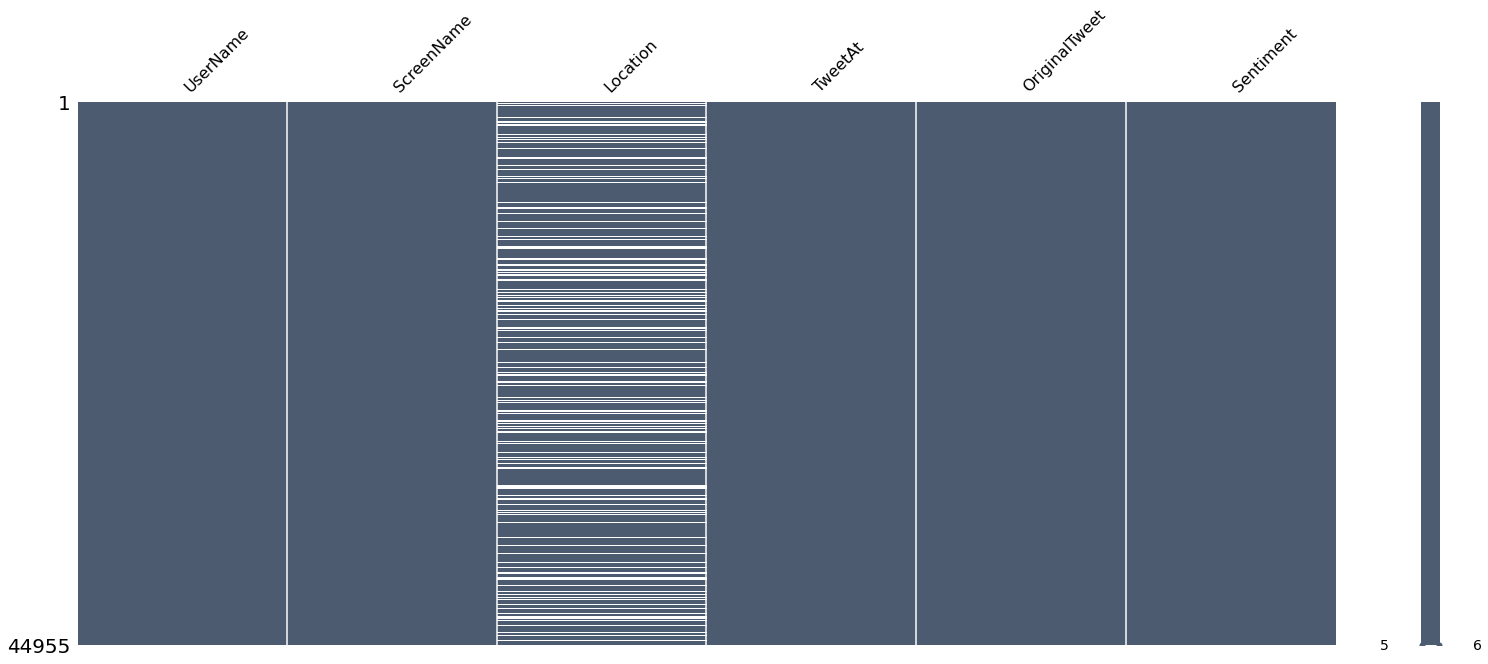

In [11]:
import missingno as msno 
msno.matrix(df, color=(0.3,0.36,0.44))


In [12]:
print("Total Tweets in this data {}".format(df.shape[0]))
print("Total Unique Users in this data {}".format(df['UserName'].nunique()))


Total Tweets in this data 44955
Total Unique Users in this data 44955


In [13]:
print(df.Sentiment.unique())
print(df.Sentiment.value_counts())

['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']
Positive              12369
Negative              10958
Neutral                8332
Extremely Positive     7223
Extremely Negative     6073
Name: Sentiment, dtype: int64


In [15]:
df['text'] = df.OriginalTweet
df['text'] = df['text'].astype(str)


train['text'] = train.OriginalTweet
train['text'] = train['text'].astype(str)

test['text'] = test.OriginalTweet
test['text'] = test['text'].astype(str)


def classes_def(x):
    if x ==  "Extremely Positive":
        return "positive"
    elif x == "Extremely Negative":
        return "negative"
    elif x == "Negative":
        return "negative"
    elif x ==  "Positive":
        return "positive"
    else:
        return "neutral"

df['sentiment'] = df['Sentiment'].apply(lambda x : classes_def(x))
train['sentiment'] = train['Sentiment'].apply(lambda x : classes_def(x))
test['sentiment'] = test['Sentiment'].apply(lambda x : classes_def(x))

target = df['sentiment']
df.sentiment.value_counts(normalize=True)

positive    0.435814
negative    0.378846
neutral     0.185341
Name: sentiment, dtype: float64

In [16]:
# 2 CLASS DISTRIBUTION 

class_df = df.groupby('sentiment').count()['text'].reset_index().sort_values(
    by='text', ascending=False)

class_df.style.background_gradient(cmap='winter')

,sentiment,text
2,positive,19592
0,negative,17031
1,neutral,8332


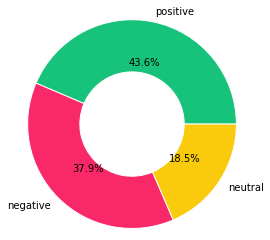

In [17]:
import matplotlib.pyplot as plt
percent_class=class_df.text
labels= class_df.sentiment

colors = ['#17C37B','#F92969','#FACA0C']

my_pie,_,_ = plt.pie(percent_class,radius = 1.2,labels=labels,colors=colors,autopct="%.1f%%")

plt.setp(my_pie, width=0.6, edgecolor='white') 

plt.show()

In [18]:
# NUMBER OF CHARACTERS 

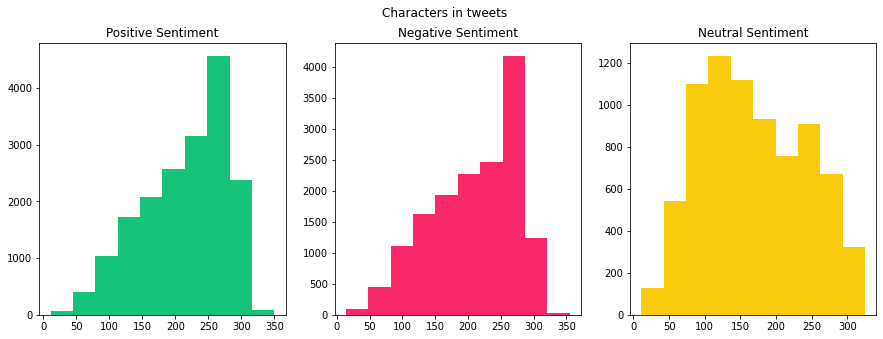

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

tweet_len = train[train['sentiment'] == "positive"]['text'].str.len()
ax1.hist(tweet_len, color='#17C37B')
ax1.set_title('Positive Sentiment')


tweet_len = train[train['sentiment'] == "negative"]['text'].str.len()
ax2.hist(tweet_len, color='#F92969')
ax2.set_title('Negative Sentiment')


tweet_len = train[train['sentiment'] == "neutral"]['text'].str.len()
ax3.hist(tweet_len, color='#FACA0C')
ax3.set_title('Neutral Sentiment')

fig.suptitle('Characters in tweets')
plt.show()


In [21]:
def length(text):
    return len(text)


df['length'] = df['text'].apply(length)
df['length']

0       111
1       237
2       131
3       306
4       310
       ... 
3793    127
3794    213
3795    185
3796    174
3797    254
Name: length, Length: 44955, dtype: int64

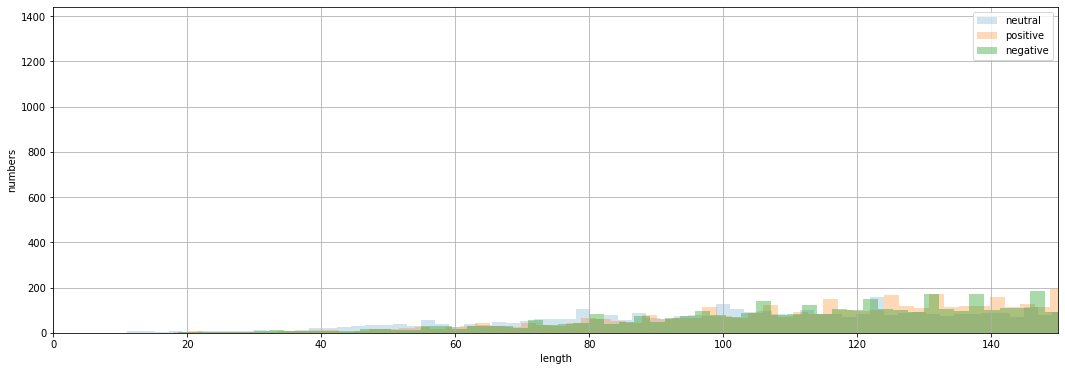

In [28]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins=150


plt.hist(df[df['sentiment'] == 'neutral']['length'], alpha = 0.2, bins=bins, label='neutral')
plt.hist(df[df['sentiment'] == "positive"]['length'], alpha = 0.3, bins=bins, label='positive')
plt.hist(df[df['sentiment'] == "negative"]['length'], alpha = 0.4, bins=bins, label='negative')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()



plt.show()

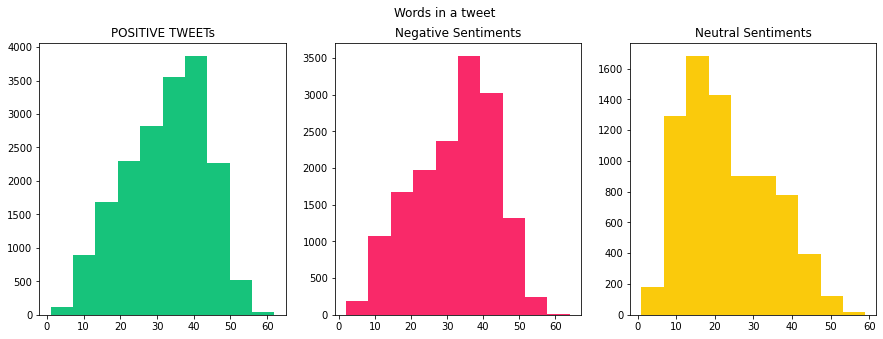

In [36]:
# NUMBER OF WORDS IN TWEET 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
tweet_len = train[train['sentiment'] == 'positive']['text'].str.split().map(lambda x : len(x))
ax1.hist(tweet_len, color='#17C37B')
ax1.set_title('POSITIVE TWEETs')

tweet_len=train[train['sentiment']=="negative"]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentiments')

tweet_len=train[train['sentiment']=="neutral"]['text'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='#FACA0C')
ax3.set_title('Neutral Sentiments')

fig.suptitle('Words in a tweet')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

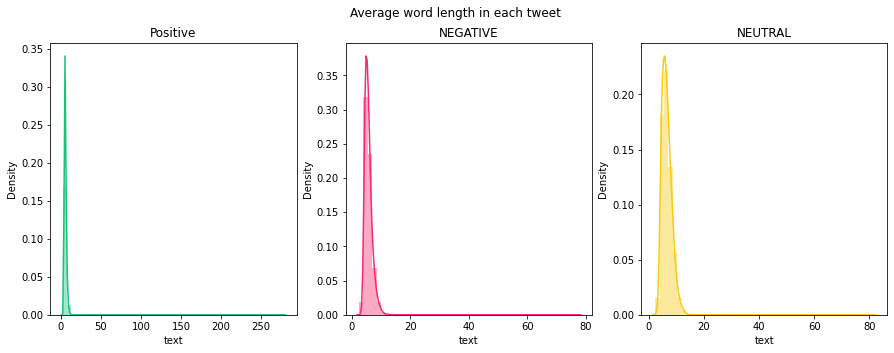

In [43]:
import seaborn as sns 
import numpy as np
import

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
word = train[train['sentiment'] =='positive']['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x  : np.mean(x)), ax=ax1, color='#17C37B')
ax1.set_title('Positive')

word = train[train['sentiment'] =='negative']['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x  : np.mean(x)), ax=ax2, color='#F92969')
ax2.set_title('NEGATIVE')

word = train[train['sentiment'] =='neutral']['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x  : np.mean(x)), ax=ax3, color='#FACA0C')
ax3.set_title('NEUTRAL')

fig.suptitle('Average word length in each tweet')

plt.show()

In [44]:
# COMMON STOP WORDS IN THE TWEETS

def create_corpus(target):
    corpus = []
    for x in train[train['sentiment']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
        return corpus

In [45]:
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from collections import defaultdict,Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string
nltk.download('stopwords')


stop=set(stopwords.words('english'))
plt.style.use('seaborn')


np.array(stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array({'were', 'wouldn', 'same', 'where', 'and', 'down', 'against', 'them', 'have', 'any', 're', "wasn't", "you'd", 'then', 'other', 'didn', 'aren', 't', 'below', 'wasn', 'me', 'which', "should've", 'about', "mightn't", 'mustn', 'myself', 'before', 'we', 'her', 'between', 'ours', "mustn't", 'needn', 'himself', 'what', 'd', 'here', 'with', 'weren', "she's", 'by', 'in', 'their', 'whom', 'through', "hasn't", 'the', 'under', 'can', 'more', 'is', 'at', 'was', 'my', 'off', 'will', 'doesn', 'until', 'ourselves', "weren't", 'only', 'am', 'so', 'now', 'do', "don't", 'your', 'or', 'as', 'while', 'should', "isn't", 'who', 'all', 'just', 'that', "aren't", 'over', 'yourselves', 'been', 'how', 'no', 'too', "you're", 'its', 'they', 'because', 'couldn', "shan't", "that'll", "couldn't", 'you', "won't", 'be', "shouldn't", 'she', 'had', 'our', 'yours', 'why', 's', 'being', 'most', 'after', 'shouldn', 'such', 'on', 'll', "it's", 'some', 'him', 'for', 'mightn', 'itself', 'these', 'above', 'won', 'don', "yo

In [47]:
comment_words = ''
stopwords = set(STOPWORDS)


for val in stopwords:

    # lets type cast it to string 
    val = str(val)
    # tokens
    tokens = val.split()

    # converting it to lower 
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()


    comment_words += " ".join(tokens)+" "




In [48]:
comment_words

"there's were same where and down against have any them i'm wasn't then you'd other she'd below would get me which about myself before we he'll how's her between mustn't ours himself what since here they'll with by she's in ought their they'd whom through here's hasn't the under can more also can't he'd at is was my http off where's weren't until ourselves only am so do don't shall they've your or as should isn't while all just who that aren't over yourselves we'll who's been how no too you're because its they why's when's shan't i've couldn't you won't be shouldn't she had our yours cannot however being she'll most after why such on it's some for him we'd we've k else itself above these you'll but did doesn't up we're once a own nor i'd let's hers his during herself from that's he yourself he's wouldn't www doing didn't r than i'll haven't does hadn't further what's they're an to this those it has com having each again if you've are few of there when out both not theirs ever could i l

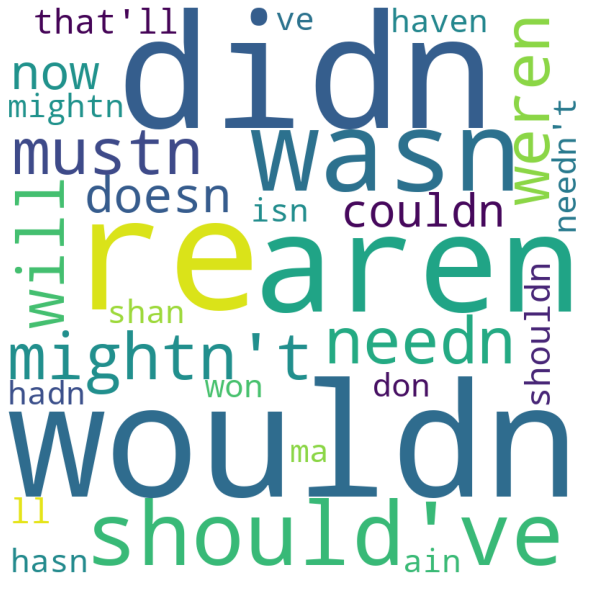

In [52]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "white") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

In [55]:
# MOST COMMON WORDS WHICH ARE NOT STOPWORDS

from collections import defaultdict,Counter
corpus=create_corpus("positive")

counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

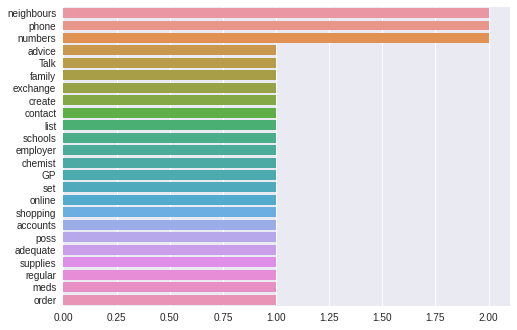

In [56]:
sns.barplot(x=y,y=x)


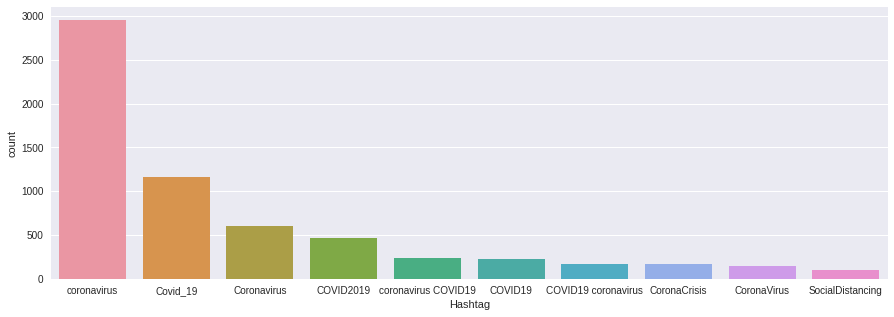

In [59]:
# HASHTAGS ihihihih

import re

def find_hash(text):
    line = re.findall(r'(?<=#)\w+', text)
    return " ".join(line)

df['hash'] = df['text'].apply(lambda x : find_hash(x))
plt.figure(figsize=(15,5))
temp = df['hash'].value_counts()[:][1:11]
temp = temp.to_frame().reset_index().rename(columns={'index':'Hashtag', 'hash':'count'})
sns.barplot(x='Hashtag', y='count', data = temp)

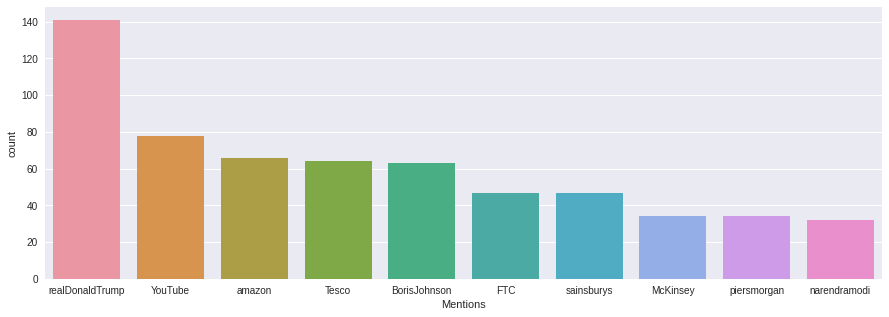

In [61]:
def mentions(text):
    line=re.findall(r'(?<=@)\w+',text)
    return " ".join(line)
df['mentions']=df['text'].apply(lambda x:mentions(x))
plt.figure(figsize=(15,5))

temp=df['mentions'].value_counts()[:][1:11]
temp =temp.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})

sns.barplot(x="Mentions",y="count", data = temp)